In [1]:
%cd /Users/ivieirivbogbe/Desktop/SPRING 2024/Predictive Modeling - 202410 BANA-7365-010/Project

/Users/ivieirivbogbe/Desktop/SPRING 2024/Predictive Modeling - 202410 BANA-7365-010/Project


In [2]:
# Importing dataset
import pandas as pd

data = pd.read_csv('travel insurance.csv')

data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

print(missing_values)

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64


In [4]:
# Handle missing values for 'Gender'
data['Gender'] = data['Gender'].fillna('Not Specified')

In [5]:
# Check for missing values after handling
missing_values = data.isnull().sum()

print(missing_values)

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64


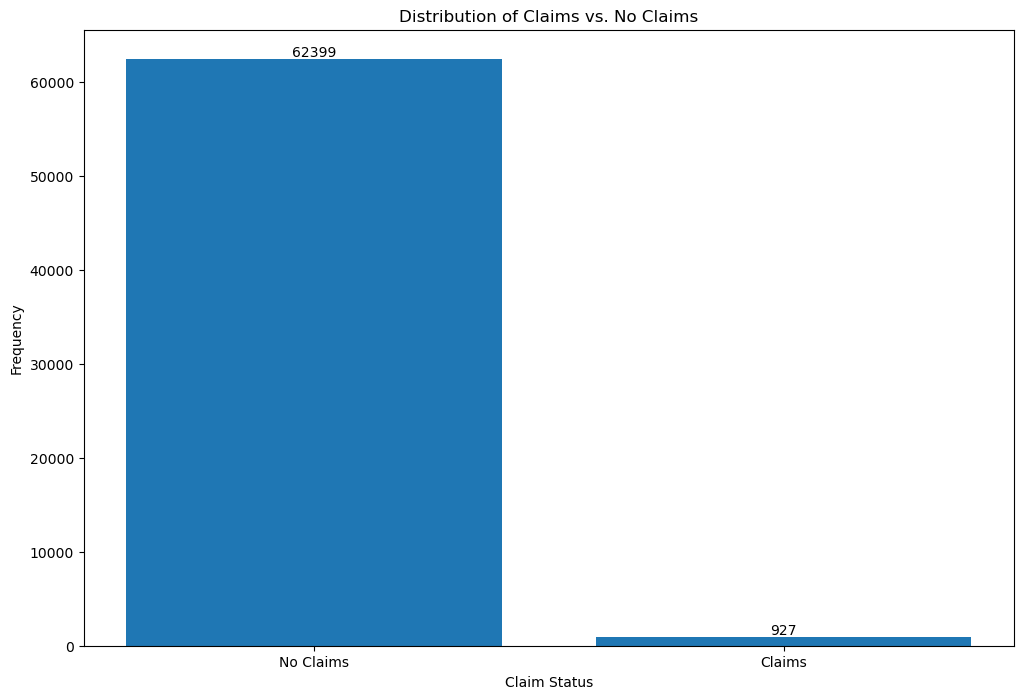

In [6]:
import matplotlib.pyplot as plt

# Calculate the number of claims vs. no claims
claim_counts = data['Claim'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(claim_counts.index, claim_counts.values)

# Add labels to the top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Set the title and labels
plt.title('Distribution of Claims vs. No Claims')
plt.xlabel('Claim Status')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No Claims', 'Claims'], rotation=0)

# Show the plot
plt.show()

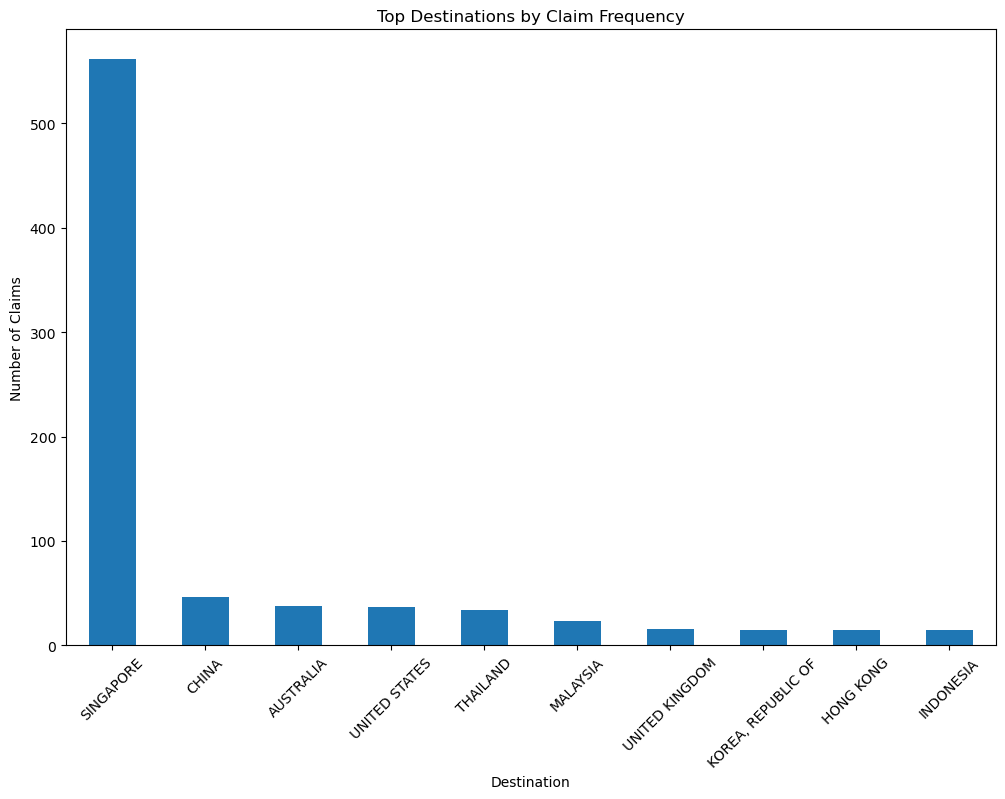

In [7]:
# Top 10 destinations by claim frequency
top_n_destinations = data[data['Claim'] == 'Yes']['Destination'].value_counts().nlargest(10)

plt.figure(figsize=(12,8))
top_n_destinations.plot(kind='bar')
plt.title('Top Destinations by Claim Frequency')
plt.xlabel('Destination')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

In [8]:
# Baseline Model without Class Balance

import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, make_scorer

# 'Claim' is the target variable
y = data['Claim'].map({'No': 0, 'Yes': 1})  # Convert target variable to binary
X = data.drop('Claim', axis=1)  # Features

# Define preprocessing for numeric features: imputation + scaling
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features: imputation + one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply the appropriate preprocessing to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a logistic regression pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Define the cross-validation strategy: stratified K-folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute mean accuracy and F1 score
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

# Print mean scores
print("Mean Accuracy:", accuracy_scores.mean())
print("\nMean F1 Score:", f1_scores.mean())

Mean Accuracy: 0.9853456720881709

Mean F1 Score: 0.0


In [9]:
# Baseline Model with Class Balance

import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, make_scorer

# 'Claim' is the target variable
y = data['Claim'].map({'No': 0, 'Yes': 1})  # Convert target variable to binary
X = data.drop('Claim', axis=1)  # Features

# Define preprocessing for numeric features: imputation + scaling
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features: imputation + one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a logistic regression pipeline with class weight 'balanced'
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

# Define the cross-validation strategy: stratified K-folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute mean accuracy and F1 score
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

# Print mean scores
print("Mean Accuracy:", accuracy_scores.mean())
print("\nMean F1 Score:", f1_scores.mean())

Mean Accuracy: 0.796797532947222

Mean F1 Score: 0.09406169887943813


In [10]:
# Logistic Regression Model With Train/Test Slipt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix

# Convert the target variable 'Claim' from categorical to numeric
data['Claim'] = data['Claim'].map({'Yes': 1, 'No': 0})

# Separate your target variable and features
y = data['Claim']  # Target variable is now numeric
X = data.drop('Claim', axis=1)  # Features

# Apply one-hot encoding to the features only
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
logreg.fit(X_train, y_train)

# Predict on the training set (to evaluate the model on the training data)
y_train_pred = logreg.predict(X_train)

# Calculate metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train, recall_train, f1_score_train, _ = precision_recall_fscore_support(y_train, y_train_pred, average='binary')
roc_auc_train = roc_auc_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_score_train}")
print(f"Training ROC AUC Score: {roc_auc_train}")
print(f"Training Confusion Matrix:\n {conf_matrix_train}")

Training Accuracy: 0.7974536123174102
Training Precision: 0.0523244871070958
Training Recall: 0.7443105756358769
Training F1 Score: 0.09777543304317242
Training ROC AUC Score: 0.7712797644072038
Training Confusion Matrix:
 [[39843 10070]
 [  191   556]]


In [11]:
# Importing dataset
import pandas as pd

data = pd.read_csv('travel insurance.csv')

# Handle missing values for 'Gender'
data['Gender'] = data['Gender'].fillna('Not Specified')

In [12]:
# Data Processing

# Importing libraries
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Convert 'Claim' to binary and prepare features matrix 'X' and target vector 'y'
y = data['Claim'].map({'No': 0, 'Yes': 1})
X = data.drop(columns=['Claim'])

# Perform the train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate the features into numeric and categorical for transformation
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create a ColumnTransformer with transformations for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

In [13]:
# Random Forest Classifier Model

# Create a pipeline with preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=20, class_weight='balanced', random_state=42))
])

# Define k-fold cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Time the cross-validation process
start_time = time.time()

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)

# Calculate the mean of the cross-validation scores
mean_cv_scores = np.mean(cv_scores)

# Time the end of cross-validation process
end_time = time.time()
print(f"\nMean cross-validation accuracy: {mean_cv_scores}")
print(f"\nCross-validation took: {end_time - start_time:.02f} seconds")

# Optionally, fit the model on the full training set and evaluate on it
pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)

# Print classification report and confusion matrix for the training set
print('\n===== Training Set Evaluation =====')
print('\nClassification Report:\n', classification_report(y_train, y_train_pred, zero_division=0))
print('\nConfusion Matrix:\n', confusion_matrix(y_train, y_train_pred))


Mean cross-validation accuracy: 0.9703711014607185

Cross-validation took: 8.25 seconds

===== Training Set Evaluation =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     49913
           1       0.47      0.83      0.60       747

    accuracy                           0.98     50660
   macro avg       0.73      0.91      0.80     50660
weighted avg       0.99      0.98      0.99     50660


Confusion Matrix:
 [[49215   698]
 [  129   618]]


In [14]:
# XGBoost Classifier Model

# scale_pos_weight implementation
value_counts = y_train.value_counts()
class_0_count = value_counts.get(0, 0)  # Number of instances of the majority class
class_1_count = value_counts.get(1, 1)  # Number of instances of the minority class
scale_pos_weight = class_0_count / class_1_count

# Create a pipeline with preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Define a wider range of parameter values to search
param_grid = {
    'classifier__max_depth': [5, 10, 15, 20, 25],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__learning_rate': [0.01, 0.1, 0.3]
}

# Configure StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training set
print("Performing grid search...")
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Summary of grid search results
print("\n===== Grid Search Summary =====")
print(f"Grid search took: {end_time - start_time:.2f} seconds")
print("Best parameters:", grid_search.best_params_)

# Predict on the training data
y_train_pred = grid_search.predict(X_train)

# Evaluate the model on the training set
print("\n===== Training Set Evaluation =====")
print('\nAccuracy:', accuracy_score(y_train, y_train_pred))
print('\nPrecision:', precision_score(y_train, y_train_pred, average='binary', zero_division=0))
print('\nRecall:', recall_score(y_train, y_train_pred))
print('\nF1 Score:', f1_score(y_train, y_train_pred))
print('\nROC AUC Score:', roc_auc_score(y_train, y_train_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_train, y_train_pred))

Performing grid search...

===== Grid Search Summary =====
Grid search took: 120.43 seconds
Best parameters: {'classifier__learning_rate': 0.3, 'classifier__max_depth': 20, 'classifier__n_estimators': 400}

===== Training Set Evaluation =====

Accuracy: 0.9971969996052112

Precision: 0.8402699662542182

Recall: 1.0

F1 Score: 0.9132029339853301

ROC AUC Score: 0.9985775248933143

Confusion Matrix:
 [[49771   142]
 [    0   747]]


In [15]:
# Best Model(XGBoost Classifier Model) - Test Prediction

# Create a pipeline with preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Define a range of parameter values to search
param_grid = {
    'classifier__max_depth': [5, 10, 15, 20, 25],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__learning_rate': [0.01, 0.1, 0.3]
}

# Configure StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training set
print("Performing grid search...")
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Summary of grid search results
print("\n===== Grid Search Summary =====")
print(f"Grid search took: {end_time - start_time:.2f} seconds")
print("Best parameters:", grid_search.best_params_)

# Predict on the test data
y_test_pred = grid_search.predict(X_test)

# Evaluate the model on the test set
print("\n===== Test Set Evaluation =====")
print('\nAccuracy:', accuracy_score(y_test, y_test_pred))
print('\nPrecision:', precision_score(y_test, y_test_pred, average='binary', zero_division=0))
print('\nRecall:', recall_score(y_test, y_test_pred))
print('\nF1 Score:', f1_score(y_test, y_test_pred))
print('\nROC AUC Score:', roc_auc_score(y_test, y_test_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_test_pred))

Performing grid search...

===== Grid Search Summary =====
Grid search took: 127.64 seconds
Best parameters: {'classifier__learning_rate': 0.3, 'classifier__max_depth': 20, 'classifier__n_estimators': 400}

===== Test Set Evaluation =====

Accuracy: 0.9741828517290384

Precision: 0.0847457627118644

Recall: 0.08333333333333333

F1 Score: 0.08403361344537816

ROC AUC Score: 0.5351794009290405

Confusion Matrix:
 [[12324   162]
 [  165    15]]


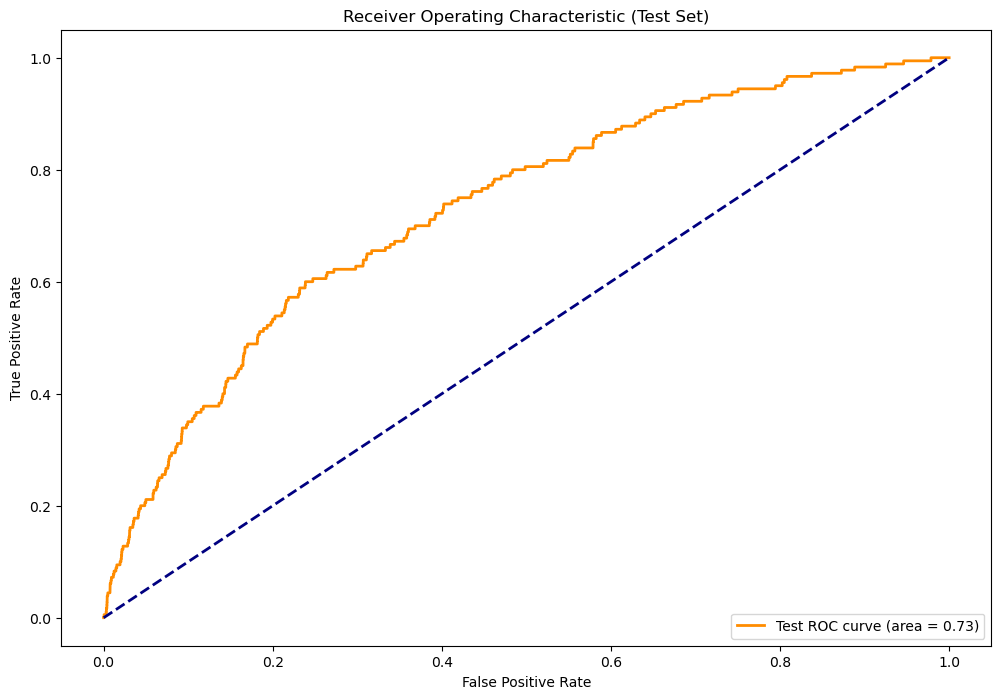

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_test_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12,8))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Test Set)')
plt.legend(loc="lower right")
plt.show()

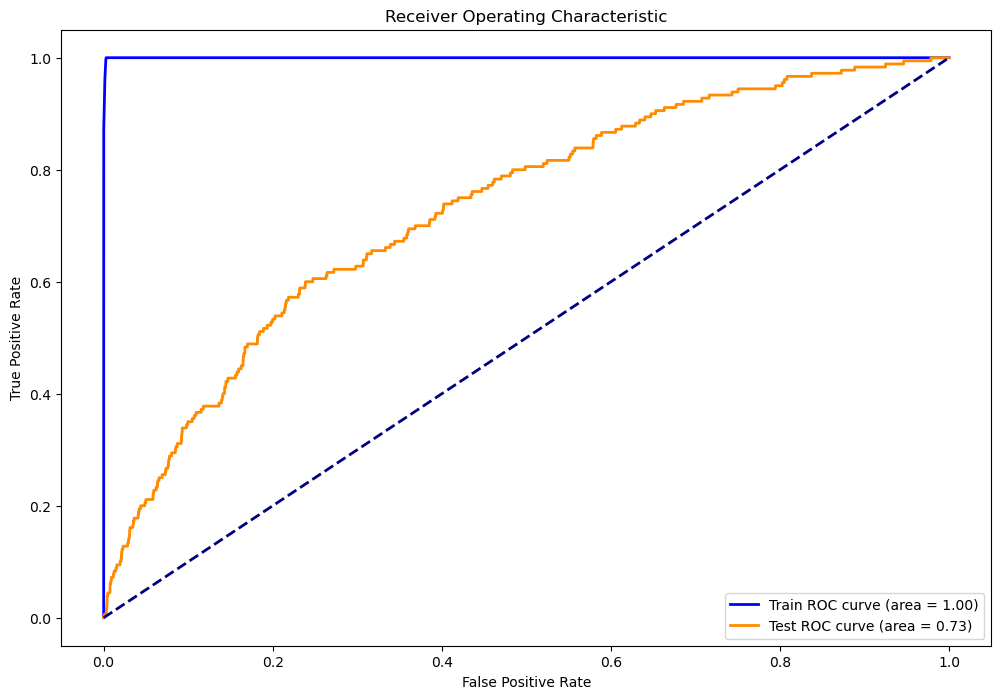

In [17]:
# Predict probabilities for both the training and test set
y_train_proba = grid_search.best_estimator_.predict_proba(X_train)[:, 1]
y_test_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and ROC area for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot both ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

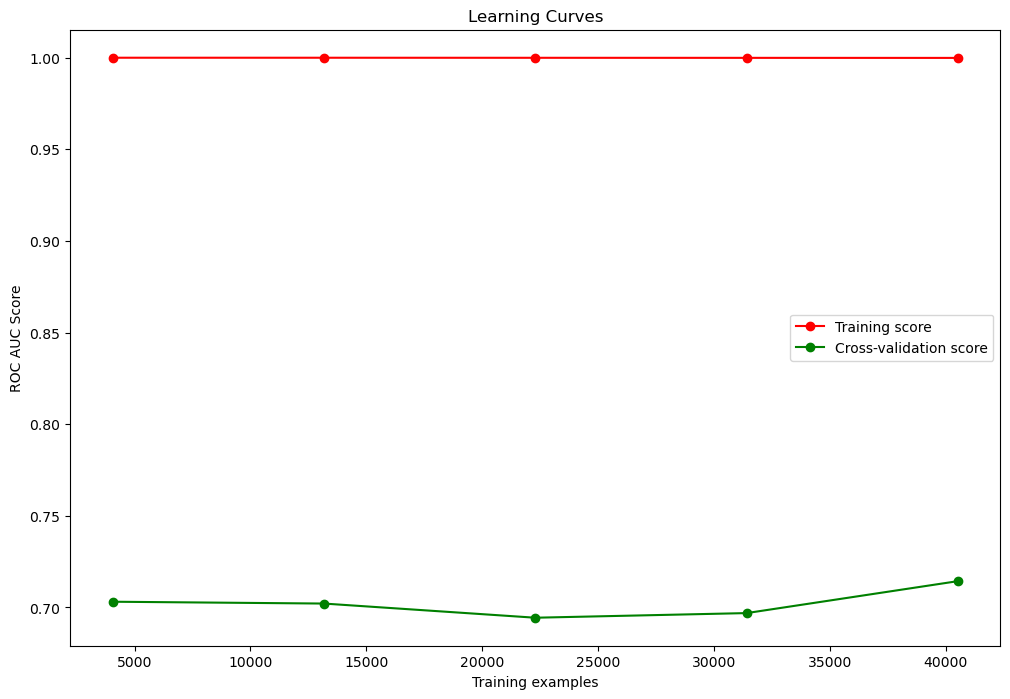

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    grid_search.best_estimator_, X_train, y_train, cv=cv, n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 5), scoring='roc_auc'
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(12,8))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("ROC AUC Score")
plt.title('Learning Curves')
plt.legend(loc="best")
plt.show()